<a href="https://colab.research.google.com/github/Megi-analitika/datascientist.github.io/blob/main/%22Advanced_optimization%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

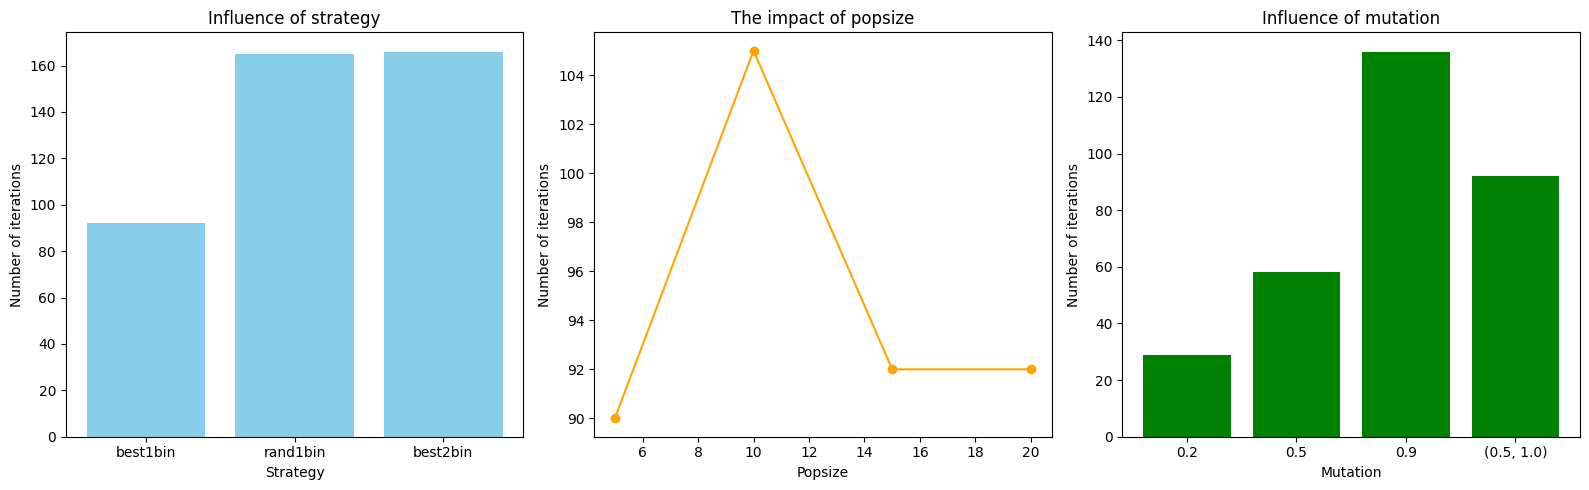

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Function Ackley
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
seed = 42

# Parameters for testing
strategies = ['best1bin', 'rand1bin', 'best2bin']
popsizes = [5, 10, 15, 20]
mutations = [0.2, 0.5, 0.9, (0.5, 1.0)]

# Dictionaries for storing results
results_strategies = {}
results_popsizes = {}
results_mutations = {}

# Exploring the impact of strategy
for strategy in strategies:
    result = differential_evolution(ackley, bounds, strategy=strategy, seed=seed)
    results_strategies[strategy] = result.nit

# Exploring the impact of popsize
for popsize in popsizes:
    result = differential_evolution(ackley, bounds, popsize=popsize, seed=seed)
    results_popsizes[popsize] = result.nit

# Exploring the effects of mutation
for mutation in mutations:
    result = differential_evolution(ackley, bounds, mutation=mutation, seed=seed)
    results_mutations[str(mutation)] = result.nit

# Visualization
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.bar(results_strategies.keys(), results_strategies.values(), color='skyblue')
plt.title('Influence of strategy')
plt.ylabel('Number of iterations')
plt.xlabel('Strategy')

plt.subplot(1, 3, 2)
plt.plot(results_popsizes.keys(), results_popsizes.values(), marker='o', color='orange')
plt.title('The impact of popsize')
plt.ylabel('Number of iterations')
plt.xlabel('Popsize')

plt.subplot(1, 3, 3)
plt.bar(results_mutations.keys(), results_mutations.values(), color='green')
plt.title('Influence of mutation')
plt.ylabel('Number of iterations')
plt.xlabel('Mutation')

plt.tight_layout()
plt.show()


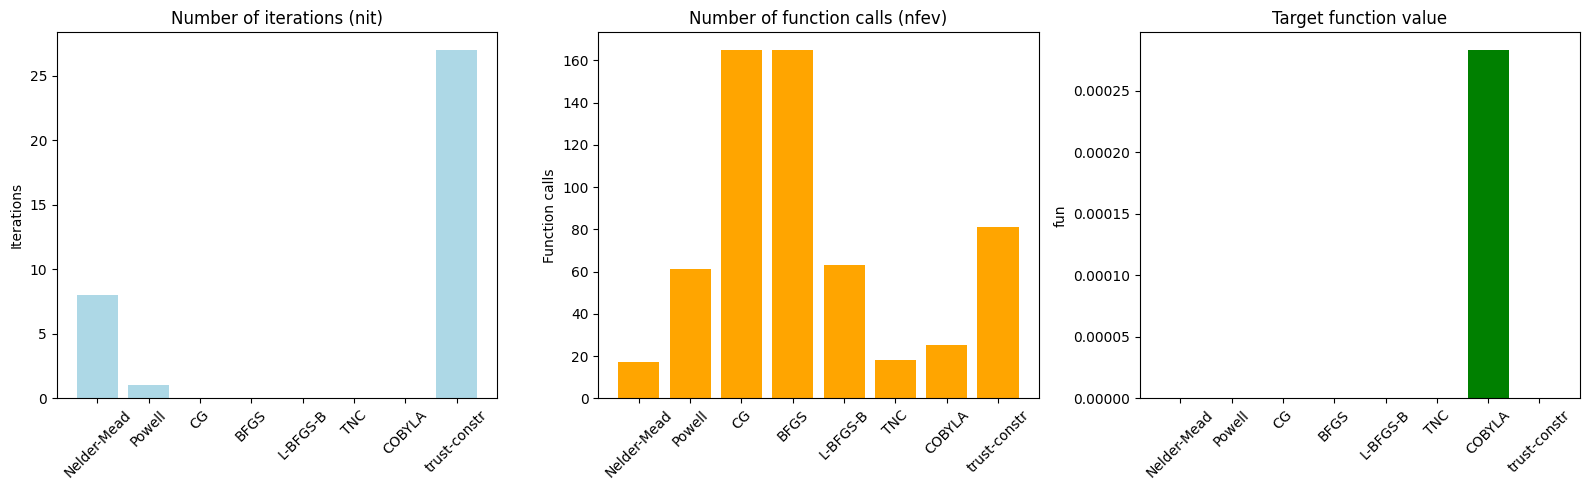

In [2]:
### Additional task
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function Ackley
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# Initial approximation
x0 = [0, 0]

# List of methods for experiments
methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'trust-constr']

# Dictionaries for storing results
results_nit = {}
results_nfev = {}
results_fun = {}

# Running through the methods
for method in methods:
    try:
        result = minimize(ackley, x0, method=method)
        results_nit[method] = result.nit if 'nit' in result else None
        results_nfev[method] = result.nfev
        results_fun[method] = result.fun
    except Exception as e:
        print(f"Method {method} failed: {e}")
        results_nit[method] = None
        results_nfev[method] = None
        results_fun[method] = None

# Visualization
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.bar(results_nit.keys(), [v if v is not None else 0 for v in results_nit.values()], color='lightblue')
plt.title('Number of iterations (nit)')
plt.ylabel('Iterations')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.bar(results_nfev.keys(), [v if v is not None else 0 for v in results_nfev.values()], color='orange')
plt.title('Number of function calls (nfev)')
plt.ylabel('Function calls')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(results_fun.keys(), [v if v is not None else 0 for v in results_fun.values()], color='green')
plt.title('Target function value')
plt.ylabel('fun')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
